

# Introduction

## About the survey

The Opinions and Lifestyle Survey is a multipurpose social survey which provides quick and reliable information about topics of immediate interest. The survey is run by the Office for National Statistics (ONS).

This unrestricted access teaching data set is a subset of the Opinions and Lifestyle Survey, Well-Being Module, January-May 2015. It has been subjected to certain simplifications and additions for the purpose of learning and teaching. For more details see: https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=7913#!/details. 

## Importing libraries and data

In [1]:
# import the pandas module
import pandas as pd

# import seaborn
import seaborn as sns

In [2]:
# import the data
wellbeing_data = pd.read_csv('Wellbeing Survey.csv')

# verify the data has imported
wellbeing_data

,Casenew,MCZ_1,MCZ_2,MCZ_8,MCZ_10,MCZ_17,QHealthr,RSEX,AGEXr,Martstat3r,HighEd4r,GorA
0,12,9,9,9,3,10,2,2,2,2,2,11
1,15,8,9,10,7,9,2,1,3,1,2,3
2,18,7,8,8,4,8,2,1,3,1,4,2
3,20,8,10,6,5,10,3,2,5,1,4,4
4,54,7,9,5,10,9,2,2,1,2,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...
2043,14954,8,5,8,10,10,1,2,3,3,1,6
2044,14970,6,8,9,10,8,2,2,6,3,3,9
2045,14972,8,8,8,4,10,3,1,4,3,2,9
2046,14975,8,10,8,7,8,1,1,2,1,2,2


A full description of the data is available at: http://doc.ukdataservice.ac.uk/doc/7913/mrdoc/pdf/7913_user_guide_ols_teaching_v2.pdf

The following are given on a scale of 0-10:

* **MCZ_1**: Overall, how satisfied are you with your life nowadays? 
* **MCZ_2**: Overall, to what extent feel things you do in your life are worthwhile? 
* **MCZ_8**: Overall, how satisfied are you with your mental wellbeing? 
* **MCZ_10**: Overall, how satisfied are you with your financial situation?
* **MCZ_17**: Overall, how satisfied are you with the area where you live? When answering, please consider the area to be within 15 to 20 minutes distance from your home.

The responses for health are recorded for:
* **QHealthr**: How is your health in general?

1: Very good, 2: Good, 3: Fair, 4: Bad, 5: Very bad

Various categorical fields are recorded for each respondent to the survey:

* **RSEX**: Sex of respondent
* **AGEXr**: Grouped age
* **Marstat3r**: Marital status – 3 categories (recoded)
* **HighEd4r**: What is the highest level of qualification?
* **GorA**: Government Office Region

`.info()` gives a sense of the dataset

In [3]:
wellbeing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048 entries, 0 to 2047
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Casenew     2048 non-null   int64
 1   MCZ_1       2048 non-null   int64
 2   MCZ_2       2048 non-null   int64
 3   MCZ_8       2048 non-null   int64
 4   MCZ_10      2048 non-null   int64
 5   MCZ_17      2048 non-null   int64
 6   QHealthr    2048 non-null   int64
 7   RSEX        2048 non-null   int64
 8   AGEXr       2048 non-null   int64
 9   Martstat3r  2048 non-null   int64
 10  HighEd4r    2048 non-null   int64
 11  GorA        2048 non-null   int64
dtypes: int64(12)
memory usage: 192.1 KB


# Pre-processing the data
Before analysing the data it is helpful to explore some of the columns.

## Removing unwanted rows

The column MCZ_1 contains data for the question: 

*Overall, how satisfied are you with your life nowadays?* 

The values are a scale from 0-10.

You can explore the column using `.describe`

In [4]:
wellbeing_data['MCZ_1'].describe()

count    2048.000000
mean        7.936035
std         5.270625
min         0.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        99.000000
Name: MCZ_1, dtype: float64

The maximum of 99 looks strange. Why are there some values>10?

In [5]:
# display the rows where the value of MCZ_1>10
wellbeing_data[wellbeing_data['MCZ_1'] > 10]

,Casenew,MCZ_1,MCZ_2,MCZ_8,MCZ_10,MCZ_17,QHealthr,RSEX,AGEXr,Martstat3r,HighEd4r,GorA
142,978,98,98,98,98,98,3,1,5,1,3,5
194,1472,99,99,9,7,10,2,2,6,3,2,8
1372,9937,98,98,98,98,98,98,2,5,1,4,3
1566,11269,99,99,6,2,8,2,1,2,1,1,8
1621,11674,98,98,98,98,98,98,2,2,2,4,5
1784,12922,98,98,98,98,98,98,2,3,3,4,5


The `MCZ_` and `QHealthr` columns appear to all have some values of 98 or 99. You can explore any row of the data set that contains 98 or 99 in one of these columns. 

In [6]:
# display any row where at least one of the conditions is true
# the symbol | is used for "or"
wellbeing_data[
    (wellbeing_data["MCZ_1"] > 10)
    | (wellbeing_data["MCZ_2"] > 10)
    | (wellbeing_data["MCZ_8"] > 10)
    | (wellbeing_data["MCZ_10"] > 10)
    | (wellbeing_data["MCZ_17"] > 10)
    | (wellbeing_data["QHealthr"] > 5)
]


,Casenew,MCZ_1,MCZ_2,MCZ_8,MCZ_10,MCZ_17,QHealthr,RSEX,AGEXr,Martstat3r,HighEd4r,GorA
142,978,98,98,98,98,98,3,1,5,1,3,5
194,1472,99,99,9,7,10,2,2,6,3,2,8
481,3422,6,99,6,7,6,2,1,4,2,4,9
531,3904,10,10,10,10,10,99,1,6,1,4,7
617,4561,4,99,6,5,98,4,1,6,1,2,4
971,6865,8,99,10,10,5,1,2,2,2,3,1
1112,7926,7,99,9,6,4,2,2,4,1,4,8
1154,8235,7,99,9,8,8,3,1,5,3,1,6
1372,9937,98,98,98,98,98,98,2,5,1,4,3
1379,9988,4,4,7,98,5,2,1,2,1,2,2


Referring to the information sheet the value of 98 corresponds to "don't know" and 99 is a refusal to answer. Removing these is unlikely to have an impact on any findings. These rows can be filtered out of the data set.

In [7]:
# Create a new data set by selecting only those row where all the MCZ values are <=10
# or the QHealthr value is <=5
wellbeing_data2 = wellbeing_data[
    (wellbeing_data["MCZ_1"] <= 10)
    & (wellbeing_data["MCZ_2"] <= 10)
    & (wellbeing_data["MCZ_8"] <= 10)
    & (wellbeing_data["MCZ_10"] <= 10)
    & (wellbeing_data["MCZ_17"] <= 10)
    & (wellbeing_data["QHealthr"] <= 5)
].copy()

# verify the data set has been created correctly
wellbeing_data2


,Casenew,MCZ_1,MCZ_2,MCZ_8,MCZ_10,MCZ_17,QHealthr,RSEX,AGEXr,Martstat3r,HighEd4r,GorA
0,12,9,9,9,3,10,2,2,2,2,2,11
1,15,8,9,10,7,9,2,1,3,1,2,3
2,18,7,8,8,4,8,2,1,3,1,4,2
3,20,8,10,6,5,10,3,2,5,1,4,4
4,54,7,9,5,10,9,2,2,1,2,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...
2043,14954,8,5,8,10,10,1,2,3,3,1,6
2044,14970,6,8,9,10,8,2,2,6,3,3,9
2045,14972,8,8,8,4,10,3,1,4,3,2,9
2046,14975,8,10,8,7,8,1,1,2,1,2,2


## Adding text fields for categorical data
It is often useful to generate an additional text field for categories that are represented as numbers in the original data set. This can help with understanding the exploratory data analysis. It is also useful for some pandas and seaborn functions as it won't be interpretted as a number. 

In [8]:
# the RSEX field is used to create a new field: Sex
# the replace dictionary uses a colon to indicate what is to be replaced and commas to separate the items
wellbeing_data2['Sex'] = wellbeing_data['RSEX'].replace({1: 'Male',
                                                         2: 'Female'})
wellbeing_data2

,Casenew,MCZ_1,MCZ_2,MCZ_8,MCZ_10,MCZ_17,QHealthr,RSEX,AGEXr,Martstat3r,HighEd4r,GorA,Sex
0,12,9,9,9,3,10,2,2,2,2,2,11,Female
1,15,8,9,10,7,9,2,1,3,1,2,3,Male
2,18,7,8,8,4,8,2,1,3,1,4,2,Male
3,20,8,10,6,5,10,3,2,5,1,4,4,Female
4,54,7,9,5,10,9,2,2,1,2,2,8,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,14954,8,5,8,10,10,1,2,3,3,1,6,Female
2044,14970,6,8,9,10,8,2,2,6,3,3,9,Female
2045,14972,8,8,8,4,10,3,1,4,3,2,9,Male
2046,14975,8,10,8,7,8,1,1,2,1,2,2,Male


# Exploratory data analysis

## Exploring the `Sex` category

### Comparing multiple features with `groupby`

You can inspect the `MCZ_` and `QHealthr` features to see if there are any differences between the two `Sex` categories.

In [9]:
# create a list of the features to be explored
features = ['MCZ_1','MCZ_2','MCZ_8','MCZ_10','MCZ_17', 'QHealthr']

# use group by to get the means of these features for male and female
wellbeing_data2.groupby('Sex')[features].mean().round(2)

,MCZ_1,MCZ_2,MCZ_8,MCZ_10,MCZ_17,QHealthr
Sex,,,,,,
Female,7.71,8.04,8.12,7.17,7.90,1.99
Male,7.65,7.73,8.16,6.92,7.89,1.93


### Comparing distributions with `displot`
The `MCZ_1` feature appears to be similar for males and females. Comparing plots of the distributions will help to confirm this.

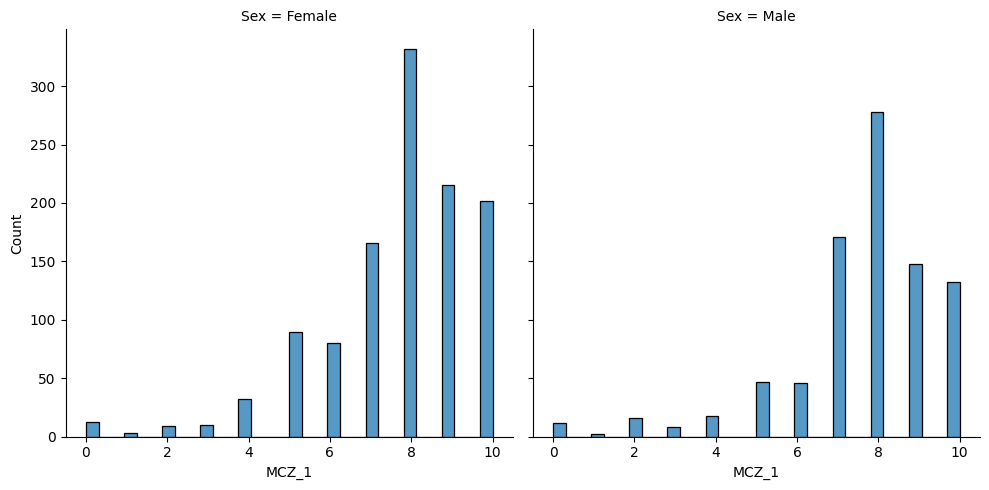

In [10]:
# plot the distribution of the MCZ_1 values for the two different values in the Sex column
sns.displot(x='MCZ_1', col='Sex', data=wellbeing_data2);

You can also compare the summary statistics using `groupby` with `describe`.

In [11]:
# find the statistics for MCZ_1 column grouped by Sex
wellbeing_data2.groupby('Sex')['MCZ_1'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,1152.0,7.71,1.93,0.0,7.0,8.0,9.0,10.0
Male,878.0,7.65,1.93,0.0,7.0,8.0,9.0,10.0


These appear to be similar suggesting that females and males in this survey responded similarly to the question:  *Overall, how satisfied are you with your life nowadays?*

### Exploring other features
Two columns that showed a difference were:
* `MCZ_2` (*Overall, to what extent do you feel things you do in your life are worthwhile?*) 
* `MCZ_10` (*Overall, how satisfied are you with your financial situation?*).

Distribution plots and statistics can be displayed for these.

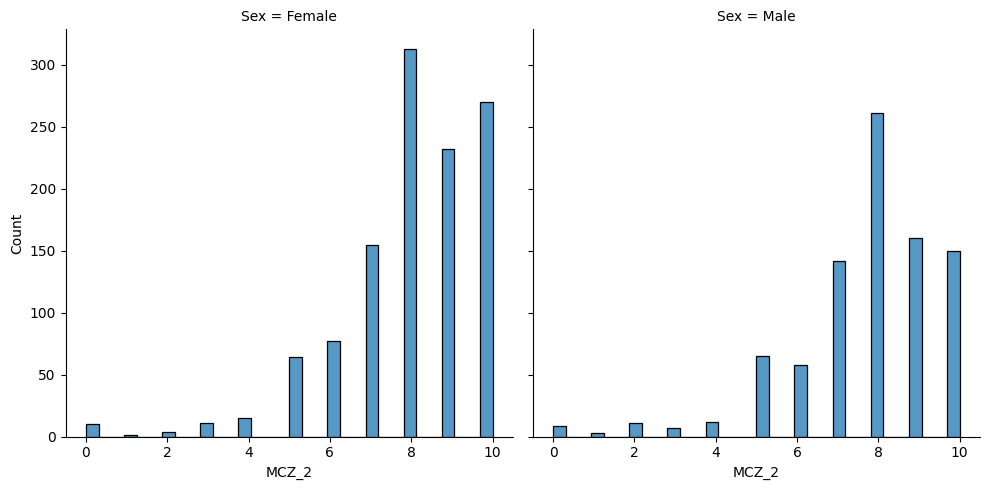

In [12]:
# plot the distribution of the MCZ_2 values for the two different values in the Sex column
sns.displot(x='MCZ_2', col='Sex', data=wellbeing_data2);

In [13]:
# group the data by Sex and find the statistics for the MCZ_2 column
wellbeing_data2.groupby('Sex')['MCZ_2'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,1152.0,8.04,1.79,0.0,7.0,8.0,9.0,10.0
Male,878.0,7.73,1.89,0.0,7.0,8.0,9.0,10.0


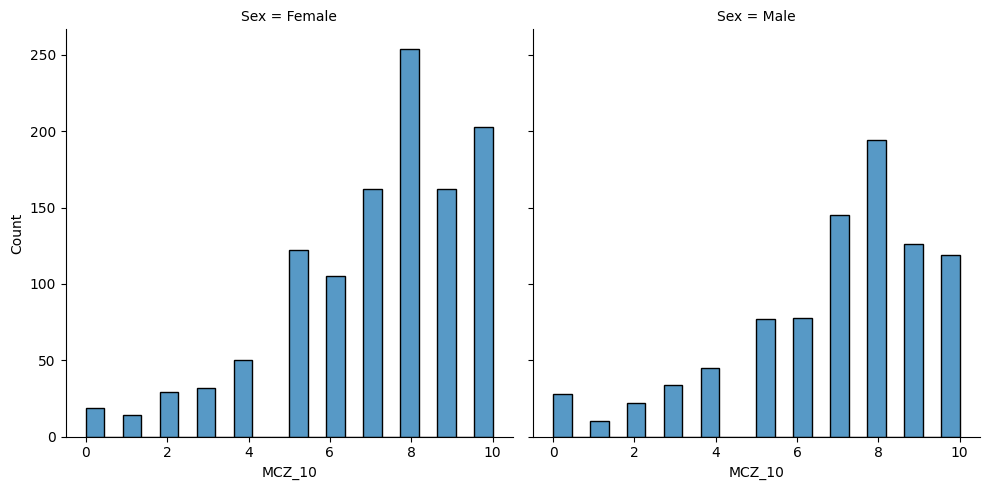

In [14]:
# plot the distribution of the MCZ_10 values for the two different values in the Sex column
sns.displot(x='MCZ_10', col='Sex', data=wellbeing_data2);

In [15]:
# group the data by Sex and find the statistics for the MCZ_10 column
wellbeing_data2.groupby('Sex')['MCZ_10'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,1152.0,7.17,2.36,0.0,6.0,8.0,9.0,10.0
Male,878.0,6.92,2.48,0.0,6.0,7.5,9.0,10.0


## Exploring Marital status

In [16]:
# create a text field for MaritalStatus based on Martstat3r
wellbeing_data2["MaritalStatus"] = wellbeing_data2["Martstat3r"].replace(
    {1: "Married/cohabiting", 2: "Single", 3: "Widowed/divorced/separated"}
)

# display the data to check it has created correctly
wellbeing_data2


,Casenew,MCZ_1,MCZ_2,MCZ_8,MCZ_10,MCZ_17,QHealthr,RSEX,AGEXr,Martstat3r,HighEd4r,GorA,Sex,MaritalStatus
0,12,9,9,9,3,10,2,2,2,2,2,11,Female,Single
1,15,8,9,10,7,9,2,1,3,1,2,3,Male,Married/cohabiting
2,18,7,8,8,4,8,2,1,3,1,4,2,Male,Married/cohabiting
3,20,8,10,6,5,10,3,2,5,1,4,4,Female,Married/cohabiting
4,54,7,9,5,10,9,2,2,1,2,2,8,Female,Single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,14954,8,5,8,10,10,1,2,3,3,1,6,Female,Widowed/divorced/separated
2044,14970,6,8,9,10,8,2,2,6,3,3,9,Female,Widowed/divorced/separated
2045,14972,8,8,8,4,10,3,1,4,3,2,9,Male,Widowed/divorced/separated
2046,14975,8,10,8,7,8,1,1,2,1,2,2,Male,Married/cohabiting


You can explore the means of all the *MCZ* or Health features for the different values of `MaritalStatus`. 

In [17]:
# create a list of the features to be explored
features=['MCZ_1','MCZ_2','MCZ_8','MCZ_10','MCZ_17', 'QHealthr']

# use group by to get the means of these for male and female
wellbeing_data2.groupby('MaritalStatus')[features].mean().round(2)

,MCZ_1,MCZ_2,MCZ_8,MCZ_10,MCZ_17,QHealthr
MaritalStatus,,,,,,
Married/cohabiting,8.10,8.23,8.33,7.43,7.99,1.84
Single,7.30,7.46,7.86,6.31,7.52,1.88
Widowed/divorced/separated,7.18,7.62,7.99,6.95,8.02,2.27


### Task 1
`MCZ_10` shows the biggest difference in means for. Use `groupby` and `displot` to find the statistics and charts for `MCZ_10` for the different values of `MaritalStatus`.

In [18]:
# use groupby and describe to get the statistics for MCZ_10 for the different marital status values
wellbeing_data2.groupby('MaritalStatus')['MCZ_10'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
MaritalStatus,,,,,,,,
Married/cohabiting,1060.0,7.43,2.17,0.0,6.0,8.0,9.0,10.0
Single,426.0,6.31,2.63,0.0,5.0,7.0,8.0,10.0
Widowed/divorced/separated,544.0,6.95,2.53,0.0,5.0,8.0,9.0,10.0


Use `displot` to create plots of the distribution of `MCZ_10` split by `MaritalStatus`

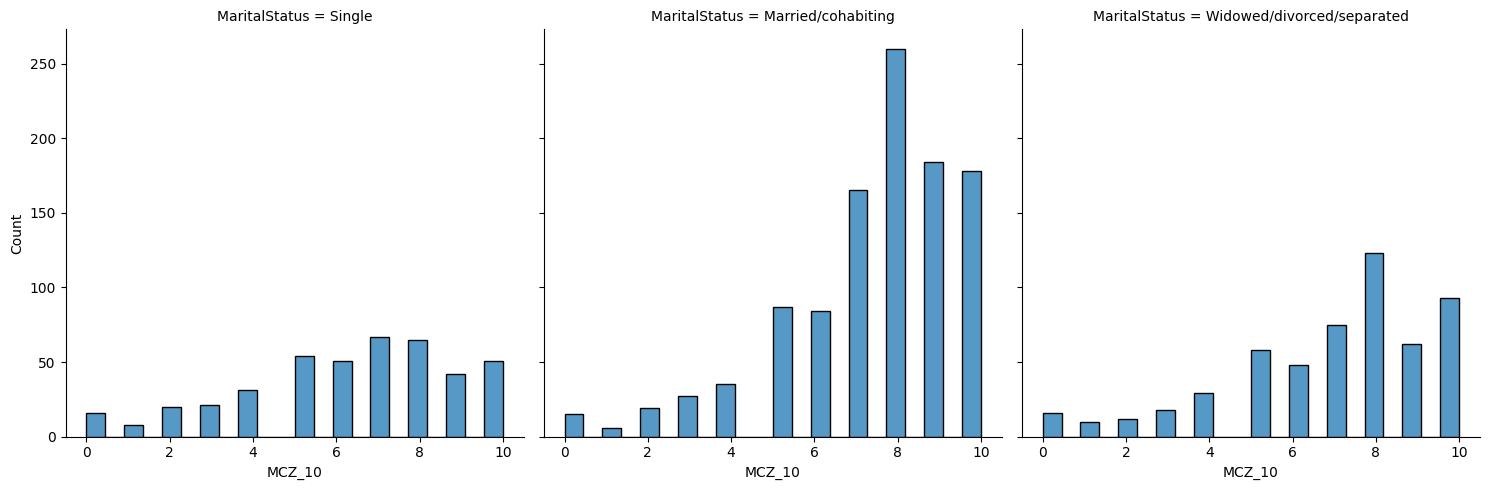

In [19]:
# create a distribution plot for MCZ_10 split by MaritalStatus
sns.displot(x='MCZ_10', col='MaritalStatus', data=wellbeing_data2);


### Task 2
Now choose another feature and explore the differences by marital status.

In [20]:
# group the data by MaritalStatus and use describe to find the statistics for a feature
wellbeing_data2.groupby('MaritalStatus')['QHealthr'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
MaritalStatus,,,,,,,,
Married/cohabiting,1060.0,1.84,0.88,1.0,1.0,2.0,2.0,5.0
Single,426.0,1.88,0.88,1.0,1.0,2.0,2.0,5.0
Widowed/divorced/separated,544.0,2.27,1.07,1.0,1.0,2.0,3.0,5.0


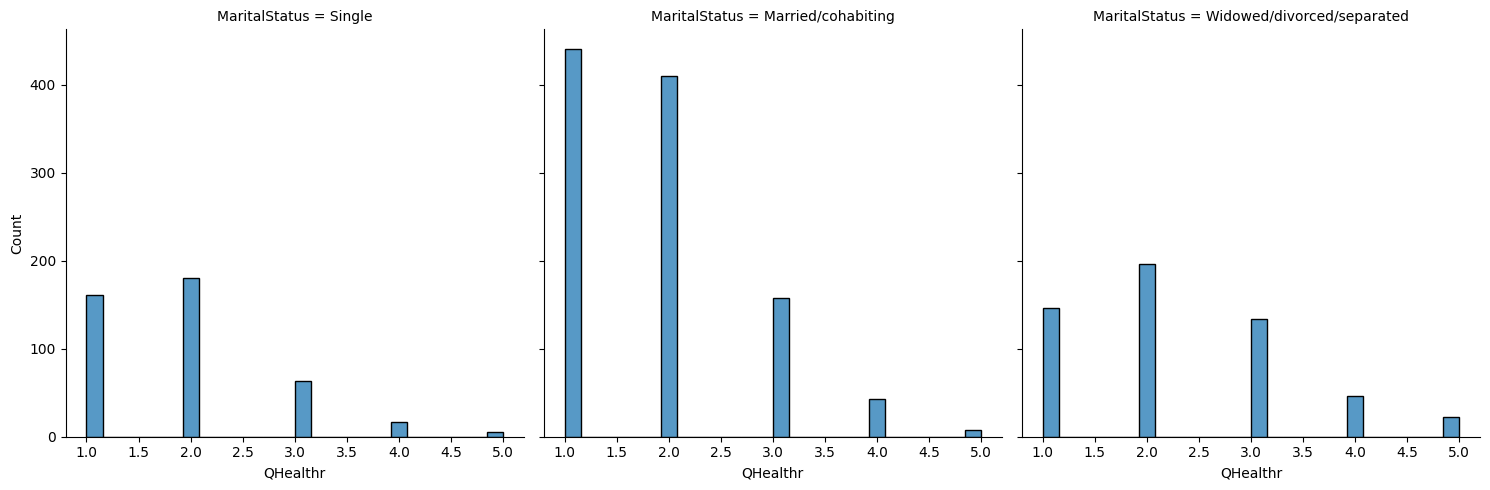

In [21]:
# display a distribution plot for a feature split by MaritalStatus
sns.displot(x='QHealthr', col='MaritalStatus', data=wellbeing_data2);

## Exploring Age

In [22]:
# create a text field for Age
wellbeing_data2["Age"] = wellbeing_data2["AGEXr"].replace(
    {1: "16-24", 2: "25-44", 3: "45-54", 4: "55-64", 5: "65-74", 6: "75+"}
)

# display the data to check it has created correctly
wellbeing_data2


,Casenew,MCZ_1,MCZ_2,MCZ_8,MCZ_10,MCZ_17,QHealthr,RSEX,AGEXr,Martstat3r,HighEd4r,GorA,Sex,MaritalStatus,Age
0,12,9,9,9,3,10,2,2,2,2,2,11,Female,Single,25-44
1,15,8,9,10,7,9,2,1,3,1,2,3,Male,Married/cohabiting,45-54
2,18,7,8,8,4,8,2,1,3,1,4,2,Male,Married/cohabiting,45-54
3,20,8,10,6,5,10,3,2,5,1,4,4,Female,Married/cohabiting,65-74
4,54,7,9,5,10,9,2,2,1,2,2,8,Female,Single,16-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,14954,8,5,8,10,10,1,2,3,3,1,6,Female,Widowed/divorced/separated,45-54
2044,14970,6,8,9,10,8,2,2,6,3,3,9,Female,Widowed/divorced/separated,75+
2045,14972,8,8,8,4,10,3,1,4,3,2,9,Male,Widowed/divorced/separated,55-64
2046,14975,8,10,8,7,8,1,1,2,1,2,2,Male,Married/cohabiting,25-44


### Task 3

You can now explore if there are a differences in any of the responses for different age categories
1. 16-24
2. 25-44
3. 45-54
4. 55-64
5. 65-74
6. 75 and over

Add additional code boxes as required.

In [23]:
# create a list of the features to be explored
features = ['MCZ_1','MCZ_2','MCZ_8','MCZ_10','MCZ_17', 'QHealthr','RSEX', 'AGEXr']

# use group by to get the means of these features for male and female
wellbeing_data2.groupby('Age')[features].mean().round(2)

,MCZ_1,MCZ_2,MCZ_8,MCZ_10,MCZ_17,QHealthr,RSEX,AGEXr
Age,,,,,,,,
16-24,7.69,7.63,8.16,6.10,7.11,1.67,1.54,1.0
25-44,7.60,7.87,8.18,6.45,7.60,1.62,1.56,2.0
45-54,7.38,7.79,7.63,6.71,7.79,1.94,1.54,3.0
55-64,7.62,7.92,8.09,7.22,8.10,2.10,1.57,4.0
65-74,8.04,8.22,8.44,7.90,8.22,2.24,1.58,5.0
75+,7.86,7.88,8.34,8.20,8.50,2.40,1.61,6.0


## Exploring two categories together

### Using `crosstab` to generate a two-way table

The data set contains mulitple categorical features. You can explore the number of data items across two categorical features by using a *two-way table*. The pandas command for a two-way table is `pd.crosstab`.

In [24]:
# Two-way table of Sex and Marital Status
pd.crosstab(wellbeing_data2['Sex'], wellbeing_data2['MaritalStatus'])

MaritalStatus,Married/cohabiting,Single,Widowed/divorced/separated
Sex,,,
Female,552,226,374
Male,508,200,170


You can generate a grid of charts to display the data split across two different categorical features. 

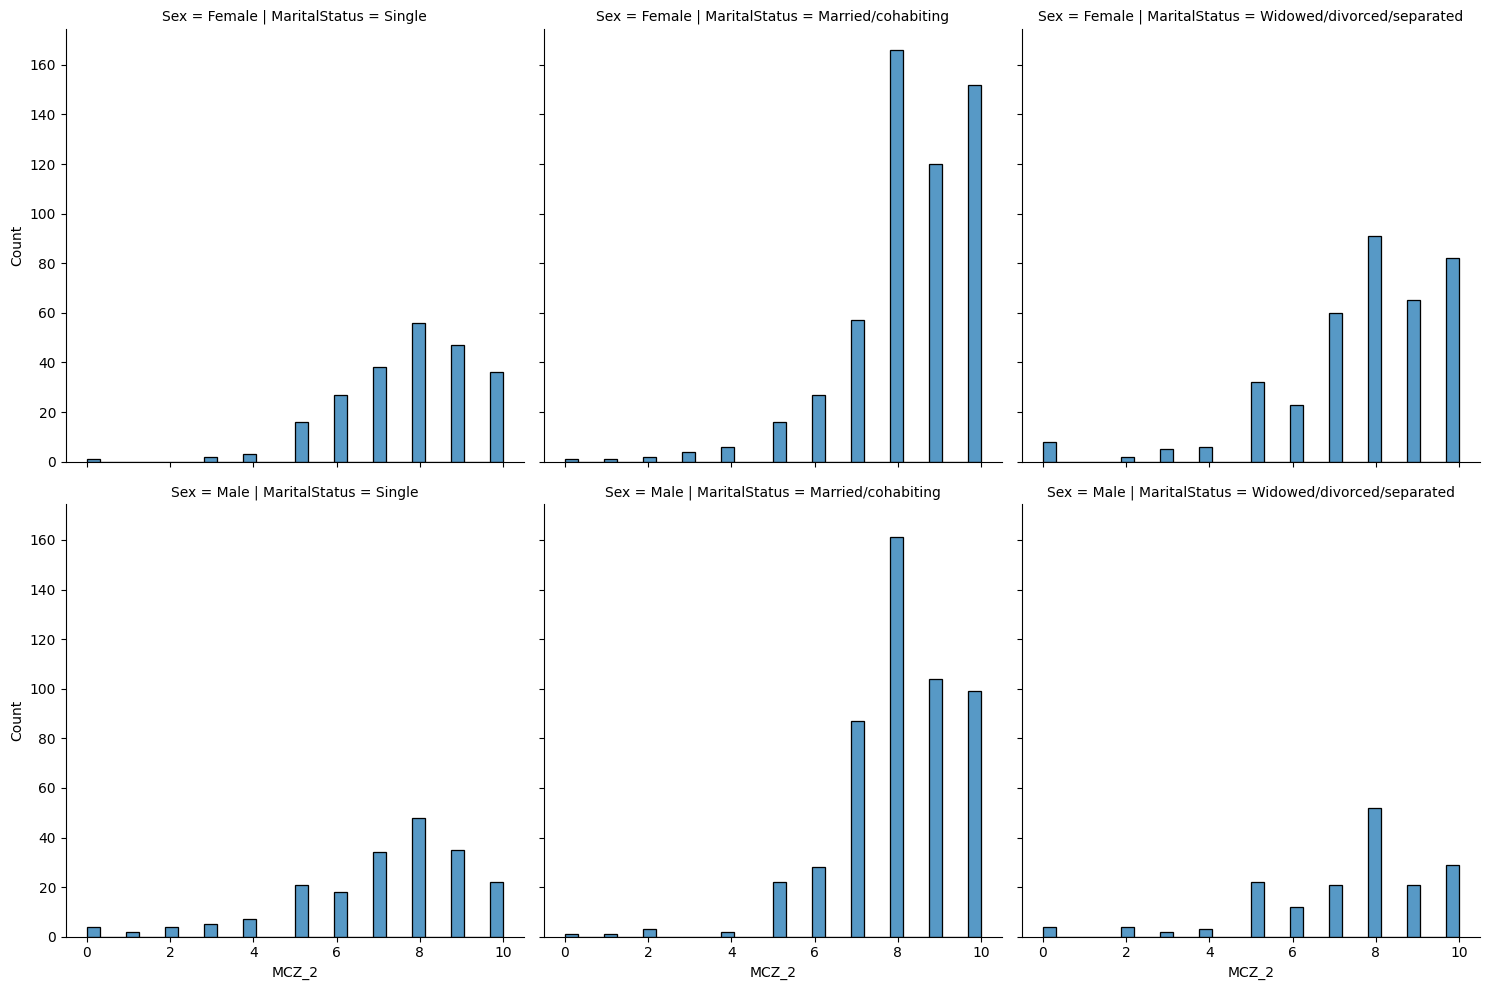

In [25]:
# col='Region' - one column per region
sns.displot(data=wellbeing_data2, x='MCZ_2', col='MaritalStatus', row='Sex');

The charts for Married/cohabiting show a difference for the responses for Female and Male. This can be explored further by extracting these data. This is known as *slicing* the data set.

# Pre-processing the data (2)

## Creating a new data set from a slice of the original

In [26]:
# generate a new data set for Married/cohabiting
married_data=wellbeing_data2[wellbeing_data2['MaritalStatus'] == 'Married/cohabiting'].copy()

# display the data to check that it has created correctly
married_data

,Casenew,MCZ_1,MCZ_2,MCZ_8,MCZ_10,MCZ_17,QHealthr,RSEX,AGEXr,Martstat3r,HighEd4r,GorA,Sex,MaritalStatus,Age
1,15,8,9,10,7,9,2,1,3,1,2,3,Male,Married/cohabiting,45-54
2,18,7,8,8,4,8,2,1,3,1,4,2,Male,Married/cohabiting,45-54
3,20,8,10,6,5,10,3,2,5,1,4,4,Female,Married/cohabiting,65-74
6,67,9,9,9,9,10,2,2,2,1,1,8,Female,Married/cohabiting,25-44
7,89,10,10,10,9,10,1,1,3,1,2,4,Male,Married/cohabiting,45-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,14898,8,7,10,10,9,1,1,3,1,2,8,Male,Married/cohabiting,45-54
2038,14905,7,7,7,5,6,2,1,2,1,2,2,Male,Married/cohabiting,25-44
2040,14925,6,7,8,4,7,2,1,2,1,2,6,Male,Married/cohabiting,25-44
2041,14933,10,10,10,9,6,1,2,3,1,3,1,Female,Married/cohabiting,45-54


# Exploratory Data Analysis (2)

## Exploring a slice



You can explore the different responses grouped by Sex using another two-way table.

In [27]:
# Two-way table of Sex and MCZ_2
pd.crosstab(married_data['Sex'], married_data['MCZ_2'])

MCZ_2,0,1,2,3,4,5,6,7,8,9,10
Sex,,,,,,,,,,,
Female,1,1,2,4,6,16,27,57,166,120,152
Male,1,1,3,0,2,22,28,87,161,104,99


The different total number of females and males can make this difficult to interpret. Setting `normalize='index'` gives the values as a proportion of the two totals.  

In [28]:
# Two-way table with normalize='index' divides each row by its total to give the proportions
pd.crosstab(married_data['Sex'], married_data['MCZ_2'], normalize='index').round(6)

MCZ_2,0,1,2,3,4,5,6,7,8,9,10
Sex,,,,,,,,,,,
Female,0.001812,0.001812,0.003623,0.007246,0.010870,0.028986,0.048913,0.103261,0.300725,0.217391,0.275362
Male,0.001969,0.001969,0.005906,0.000000,0.003937,0.043307,0.055118,0.171260,0.316929,0.204724,0.194882


You can use this to find the proportions of females and the proportions of males that responded with a score of 8 or higher.

In [29]:
0.300725+0.217391+0.275362

0.793478

In [30]:
0.316929+0.204724+0.194882

0.716535

Alternatively:

In [31]:
str(round(100*(0.300725+0.217391+0.275362),1))+"% of females responded with a score of 8 or higher."

'79.3% of females responded with a score of 8 or higher.'

In [32]:
str(round(100*(0.316929+0.204724+0.194882),1))+"% of males responded with a score of 8 or higher."

'71.7% of males responded with a score of 8 or higher.'

The widest difference in response seems to be at MCZ_2 = 10

# Appendix

## Normalising a distribution plot
It is sometimes helpful to *normalise* distribution plots to help comparisons. You can also add `discrete=True` so that the bars are centred on the values. Examples of this are shown below.

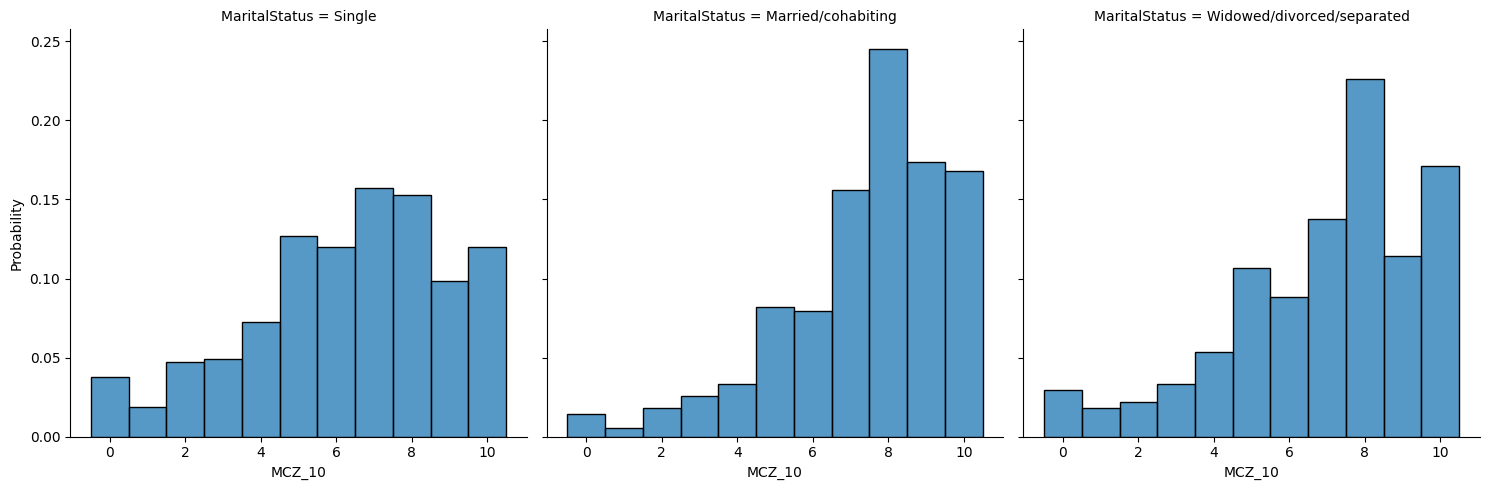

In [33]:
# plot the distribution of the MCZ_10 values for the two different values in the Sex column
sns.displot(
    x="MCZ_10",
    col="MaritalStatus",
    data=wellbeing_data2,
    stat="probability",
    common_norm=False,
    discrete=True,
);


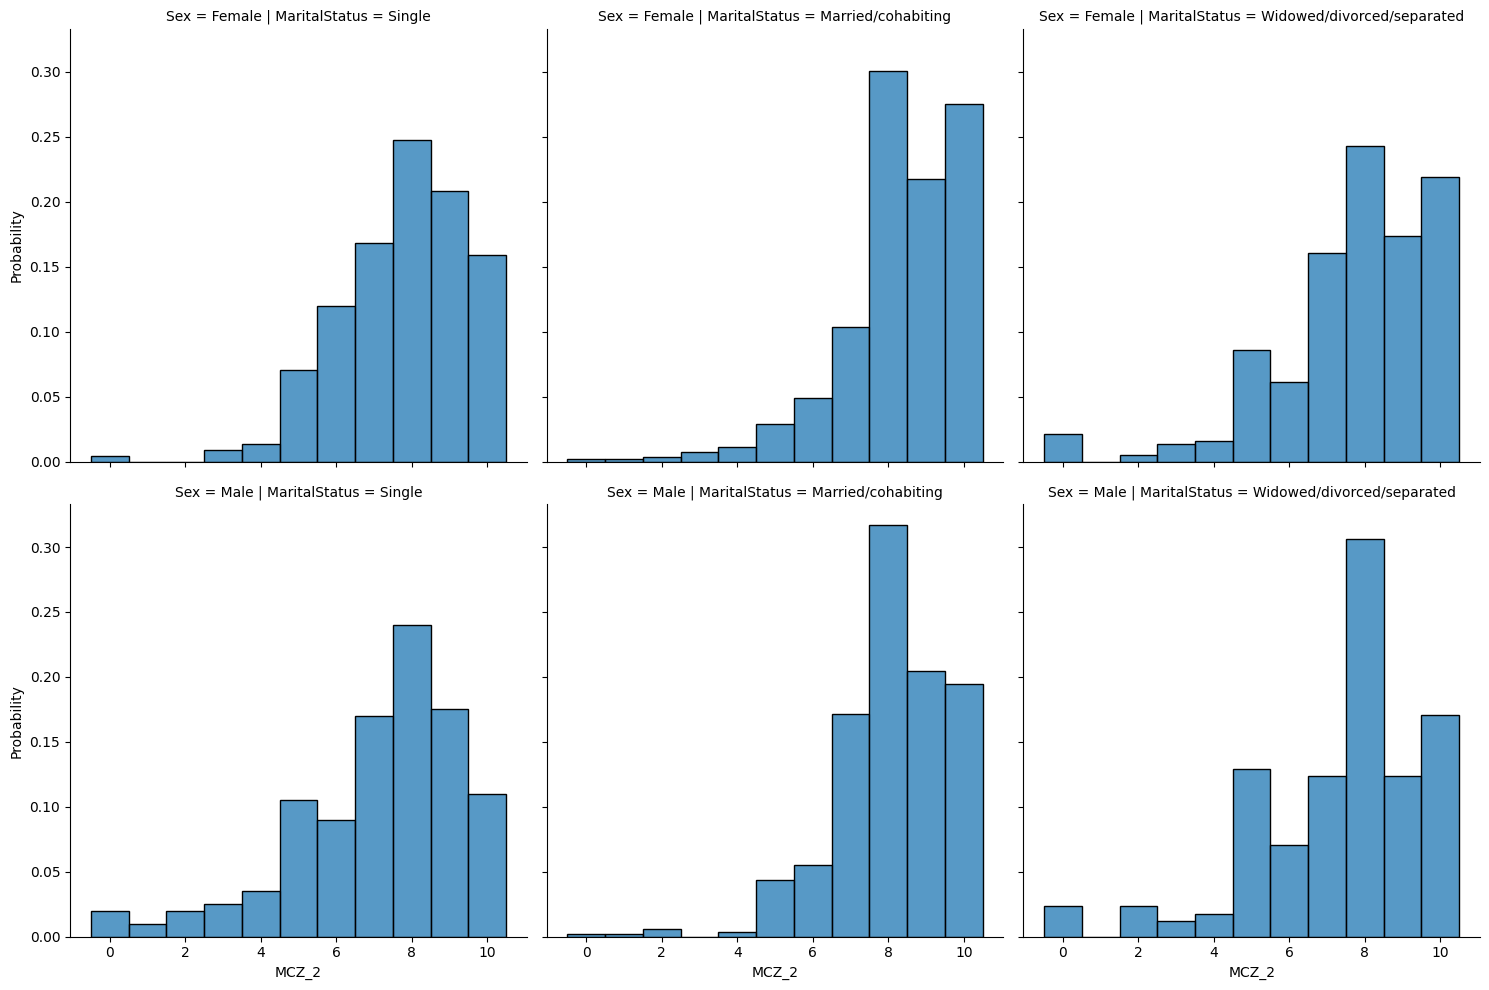

In [34]:
# col='MaritalStatus' - one column per value of MaritalStatus
sns.displot(
    data=wellbeing_data2,
    x="MCZ_2",
    col="MaritalStatus",
    row="Sex",
    stat="probability",
    common_norm=False,
    discrete=True,
);


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=40f61d79-043f-441d-8c61-9a00863f826f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>